In [10]:
import pandas as pd
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Round1_Diagnostic_23.csv")

In [3]:
df

,id,own,competing1,competing3,borrowertype,accepted,default,profit
0,1,0.0422,0.027688,0.131479,3,0,0,NaN
1,2,0.2069,0.967304,NaN,1,1,1,-10000.0
2,3,0.0578,0.028157,0.178069,3,0,0,NaN
3,4,0.0991,0.827000,0.657983,3,1,0,991.0
4,5,0.3684,1.000000,NaN,1,1,0,3684.0
...,...,...,...,...,...,...,...,...
99995,99996,0.0923,0.867200,NaN,3,1,0,923.0
99996,99997,0.1102,0.899889,0.144649,3,1,0,1102.0
99997,99998,0.1469,0.820700,0.140411,3,0,0,NaN
99998,99999,0.0341,0.483131,0.383783,2,1,0,341.0


In [4]:
df_us = df[["id", "own", "accepted", "default", "profit"]]

In [5]:
df_us = df_us[df_us["accepted"] == 1]

In [7]:
df_us["default"].value_counts()

default
0    50027
1     5432
Name: count, dtype: int64

In [10]:
revenue = df_us["profit"][df_us["default"] == 0].sum()

In [11]:
revenue

68202771.98358

In [6]:
df_us

,id,own,accepted,default,profit
1,2,0.2069,1,1,-10000.0
3,4,0.0991,1,0,991.0
4,5,0.3684,1,0,3684.0
5,6,0.1828,1,0,1828.0
6,7,0.0383,1,0,383.0
...,...,...,...,...,...
99994,99995,0.0314,1,0,314.0
99995,99996,0.0923,1,0,923.0
99996,99997,0.1102,1,0,1102.0
99998,99999,0.0341,1,0,341.0


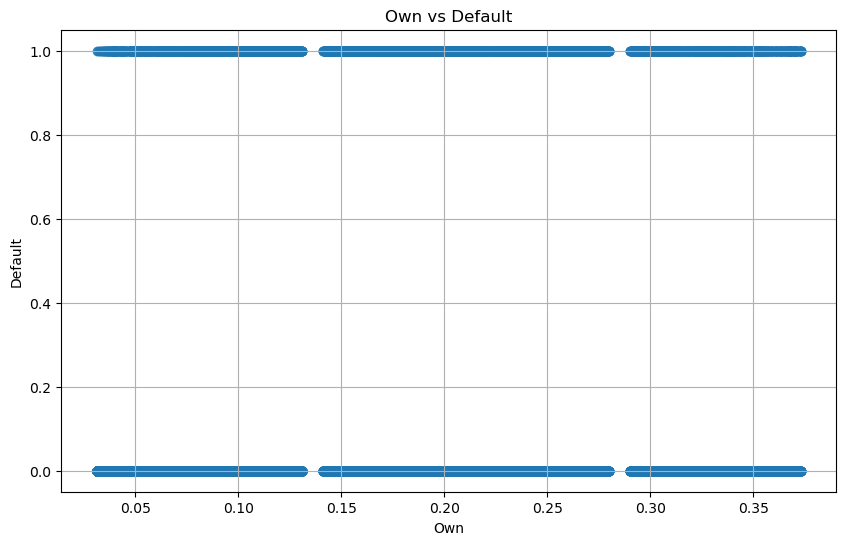

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_us["own"], df_us["default"], alpha=0.5)
plt.title("Own vs Default")
plt.xlabel("Own")
plt.ylabel("Default")
plt.grid(True)
plt.show()

<Axes: xlabel='own_bin'>

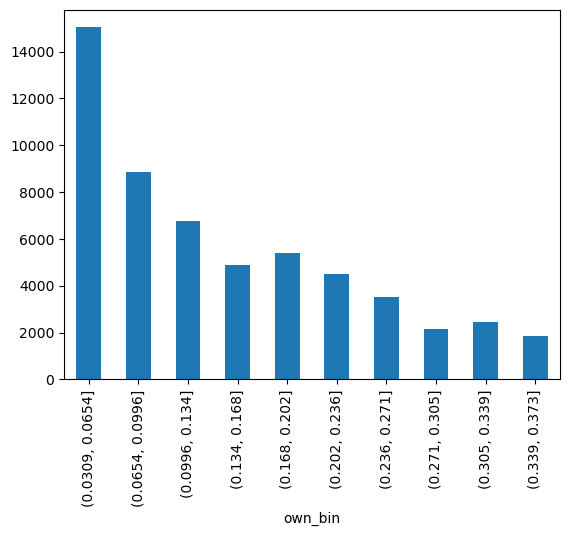

In [9]:
# Bin own and plot the default and not default

df_us["own_bin"] = pd.cut(df_us["own"], bins=10)

df_us["own_bin"].value_counts().sort_index().plot(kind="bar")


C:\Users\ameya\AppData\Local\Temp\ipykernel_37792\2196563328.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_share = df_us.groupby("own_bin")["default"].mean()


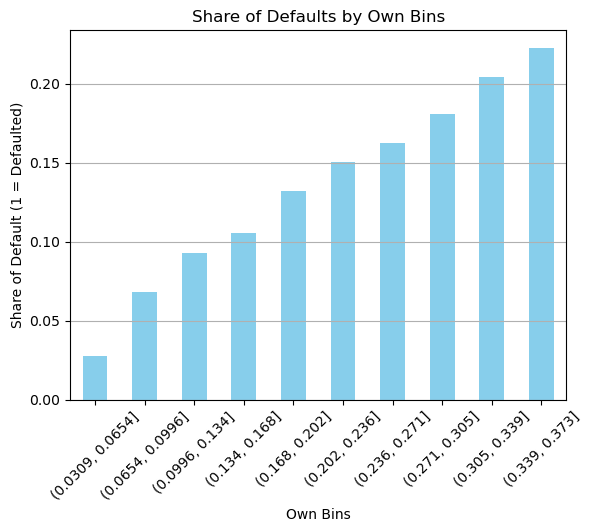

In [11]:
# Step 1: Bin the 'own' variable
df_us["own_bin"] = pd.cut(df_us["own"], bins=10)

# Step 2: Calculate the share of defaults in each bin
default_share = df_us.groupby("own_bin")["default"].mean()

# Step 3: Plot the share of defaults
default_share.plot(kind="bar", color="skyblue")
plt.title("Share of Defaults by Own Bins")
plt.xlabel("Own Bins")
plt.ylabel("Share of Default (1 = Defaulted)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [12]:
# Creating round 1 training data

df_feature = pd.read_csv("NewApplications_Lender3_Round1.csv")

In [14]:
df = df[["id", "default"]]

In [15]:
df

,id,default
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
99995,99996,0
99996,99997,0
99997,99998,0
99998,99999,0


In [16]:
df_feature = pd.merge(df_feature, df, on="id", how="left")

In [18]:
df_feature.to_csv("Round1_Training.csv", index=False)